In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, r2_score

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV

In [3]:
data = pd.read_csv('/data/keeling/a/kheimes2/more_space/Grad_Classes/' \
            'ATMS523_Repos/ATMS-523-Module-5/homework/radar_parameters.csv').drop(
                columns=['Unnamed: 0'])
data = data.rename(columns={'Adr (dB/km)':'Adp (dB/km)'})
data

,Zh (dBZ),Zdr (dB),Ldr (dB),Kdp (deg km-1),Ah (dBZ/km),Adp (dB/km),R (mm/hr)
0,23.144878,0.418637,-41.757733,0.005395,0.000290,0.000012,2.393520
1,22.737156,0.322850,-43.772069,0.005194,0.000360,0.000012,3.502699
2,26.869826,0.330948,-43.577399,0.013385,0.000903,0.000030,8.627561
3,28.540561,0.399480,-42.139731,0.018872,0.001036,0.000043,8.424447
4,30.500127,0.543758,-39.763087,0.027438,0.001157,0.000064,8.189291
...,...,...,...,...,...,...,...
18964,31.515997,0.579955,-39.244229,0.034048,0.001417,0.000080,10.648020
18965,29.993334,0.567935,-39.399188,0.024134,0.001032,0.000057,7.981875
18966,31.685913,0.655681,-38.375696,0.033971,0.001165,0.000081,6.822691
18967,32.980096,0.768586,-37.166218,0.043117,0.001285,0.000105,6.801169


In [4]:
X = data.drop(columns=['R (mm/hr)'])
y = data['R (mm/hr)']
print(X)
print(y)

        Zh (dBZ)  Zdr (dB)   Ldr (dB)  Kdp (deg km-1)  Ah (dBZ/km)  \
0      23.144878  0.418637 -41.757733        0.005395     0.000290   
1      22.737156  0.322850 -43.772069        0.005194     0.000360   
2      26.869826  0.330948 -43.577399        0.013385     0.000903   
3      28.540561  0.399480 -42.139731        0.018872     0.001036   
4      30.500127  0.543758 -39.763087        0.027438     0.001157   
...          ...       ...        ...             ...          ...   
18964  31.515997  0.579955 -39.244229        0.034048     0.001417   
18965  29.993334  0.567935 -39.399188        0.024134     0.001032   
18966  31.685913  0.655681 -38.375696        0.033971     0.001165   
18967  32.980096  0.768586 -37.166218        0.043117     0.001285   
18968  28.731399  0.804155 -36.795913        0.015908     0.000469   

       Adp (dB/km)  
0         0.000012  
1         0.000012  
2         0.000030  
3         0.000043  
4         0.000064  
...            ...  
18964     0.

/data/keeling/a/kheimes2/miniconda3/envs/xarray-climate/lib/python3.13/site-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


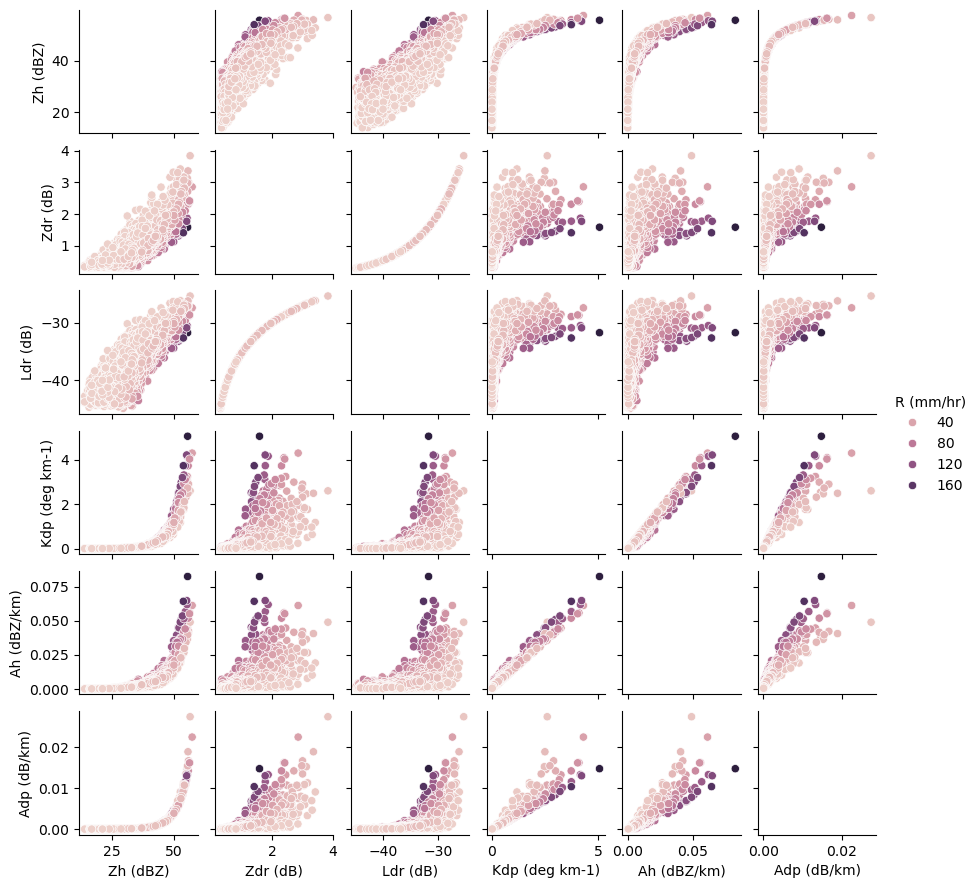

In [5]:
sns.pairplot(data, hue='R (mm/hr)', size=1.5)

# 1) Split data into a 70/30 split

In [6]:
# Split into train and test data, default 70/30%
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)
print(Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape)

(14226, 6) (4743, 6) (14226,) (4743,)


# Baseline predictions

In [7]:
def baseline (Z):
    R = (Z/200)**(1/1.6)
    return (R)

In [8]:
Z_data = 10**(X['Zh (dBZ)']/10)
base_pred = baseline(Z_data)
print(base_pred)

0        1.019556
1        0.961454
2        1.742691
3        2.216365
4        2.938422
           ...   
18964    3.400996
18965    2.731742
18966    3.485185
18967    4.198675
18968    2.278079
Name: Zh (dBZ), Length: 18969, dtype: float64


In [9]:
rsq_base = r2_score(y, base_pred)
rmse_base = root_mean_squared_error(y, base_pred)
print('Baseline R^2: ', rsq_base)
print('Baseline RMSE: ', rmse_base)

Baseline R^2:  0.3023229070437504
Baseline RMSE:  7.157590840042378


# 2) Linear Regression Model
- Train a linear regression dataset on training dataset
- Validate it using testing dataset
- Compare: R^2 and root mean square errors:
    - Model on the training and testing sets vs baseline

In [10]:
# 1) Choose class... LinearRegression
from sklearn.linear_model import LinearRegression
# 2) Choose hyperparameters
model_lreg = LinearRegression(fit_intercept=True)
# 3) Arrange data into a features matrix and target vector... 
    # Done! (X and y)
# 4) Fit model
model_lreg.fit(Xtrain, ytrain)
print('Coefficient: ', model_lreg.coef_)
print('Y-intercept: ', model_lreg.intercept_)
# 5) Apply model
y_train_lreg_pred = model_lreg.predict(Xtrain)
y_test_lreg_pred = model_lreg.predict(Xtest)
print('R predicted for training data:', y_train_lreg_pred)
print('R predicted for testing data:',y_test_lreg_pred)

Coefficient:  [ 1.69014979e-01  1.72840752e+00 -6.07178045e-01 -6.99037855e+01
  7.70808464e+03 -6.07534649e+03]
Y-intercept:  -28.825385442326148
R predicted for training data: [15.83692803 10.89007376 11.59115111 ... 13.64921728  2.51956253
  5.54435888]
R predicted for testing data: [ 4.72833734 16.20218908  6.88202904 ...  6.92642924  7.35364209
  2.63233506]


In [11]:
rsq_lreg_train = r2_score(ytrain, y_train_lreg_pred)
rmse_lreg_train = root_mean_squared_error(ytrain, y_train_lreg_pred)

rsq_lreg_test = r2_score(ytest, y_test_lreg_pred)
rmse_lreg_test = root_mean_squared_error(ytest, y_test_lreg_pred)

print('Baseline R^2: ', rsq_base)
print('Linear Regression Model Training R^2: ', rsq_lreg_train)
print('Linear Regression Model Testing R^2: ', rsq_lreg_test)
print('-----')
print('Baseline RMSE: ', rmse_base)
print('Linear Regression Model Training RMSE: ', rmse_lreg_train)
print('Linear Regression Model Testing RMSE: ', rmse_lreg_test)
print('-----')
print('Using the linear regression model to predicted R for the training and testing dataset...\n' \
'both have less error than using the baseline method')

Baseline R^2:  0.3023229070437504
Linear Regression Model Training R^2:  0.9883088699262695
Linear Regression Model Testing R^2:  0.9883887768472404
-----
Baseline RMSE:  7.157590840042378
Linear Regression Model Training RMSE:  0.9351383146701363
Linear Regression Model Testing RMSE:  0.8971836259250445
-----
Using the linear regression model to predicted R for the training and testing dataset...
both have less error than using the baseline method


# 3) Higher Ordered Polynomial Models
- Orders: 0-9
- Cross validation of 7 folds
- For best polynomial model in terms of R^2... does it outperform the baseline and the linear regression model in terms of R^2 and root mean square error?

In [12]:
# A function that creates a sklearn pipeline, for this case:
    # Create linear regression model with a higher order (polynomial model)
def PolynomialRegression(degree=2):
    return make_pipeline(PolynomialFeatures(degree),LinearRegression())

In [13]:
# defining hyperparameters we want to test over, for this case:
    # Building linear regression models (polynomial models) with orders up to 9
param_grid = {'polynomialfeatures__degree': np.arange(10)}

# Setting up grid to move through and test many different models, for this case:
    # a) linear regression model
    # b) tests up to 9 degrees
    # c) based on best R^2
    # d) cross validation splitting strategy of 7
grid = GridSearchCV(PolynomialRegression(), param_grid,scoring='r2', cv=7)
grid

,estimator,Pipeline(step...egression())])
,param_grid,"{'polynomialfeatures__degree': array([0, 1, ..., 6, 7, 8, 9])}"
,scoring,'r2'
,n_jobs,None
,refit,True
,cv,7
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,degree,2


In [14]:
grid.fit(Xtrain, ytrain)

,estimator,Pipeline(step...egression())])
,param_grid,"{'polynomialfeatures__degree': array([0, 1, ..., 6, 7, 8, 9])}"
,scoring,'r2'
,n_jobs,None
,refit,True
,cv,7
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,degree,np.int64(3)


In [15]:
grid.best_params_

{'polynomialfeatures__degree': np.int64(3)}

In [16]:
model_poly = grid.best_estimator_

# 4) Fit model
model_poly.fit(Xtrain, ytrain)
# 5) Apply model
y_train_poly_pred = model_poly.predict(Xtrain)
y_test_poly_pred = model_poly.predict(Xtest)
print('R predicted for training data:', y_train_poly_pred)
print('R predicted for testing data:',y_test_poly_pred)

R predicted for training data: [15.73851515 10.86691939 12.08040378 ... 12.92182906  2.71918076
  5.57667343]
R predicted for testing data: [ 3.4381743  18.77980768  6.29757432 ...  6.43659727  7.33038529
  2.79855334]


In [18]:
rsq_poly_train = r2_score(ytrain, y_train_poly_pred)
rmse_poly_train = root_mean_squared_error(ytrain, y_train_poly_pred)

rsq_poly_test = r2_score(ytest, y_test_poly_pred)
rmse_poly_test = root_mean_squared_error(ytest, y_test_poly_pred)

print('Baseline R^2: ', rsq_base)
print('Linear Regression Model Training R^2: ', rsq_lreg_train)
print('Linear Regression Model Testing R^2: ', rsq_lreg_test)
print('Polynomial Model Training R^2: ', rsq_poly_train)
print('Polynomial Model Testing R^2: ', rsq_poly_test)
print('-----')
print('Baseline RMSE: ', rmse_base)
print('Linear Regression Model Training RMSE: ', rmse_lreg_train)
print('Linear Regression Model Testing RMSE: ', rmse_lreg_test)
print('Polynomial Model Training RMSE: ', rmse_poly_train)
print('Polynomial Model Testing RMSE: ', rmse_poly_test)
print('-----')
print('The polynomial model outperforms the baseline and linear regression model')

Baseline R^2:  0.3023229070437504
Linear Regression Model Training R^2:  0.9883088699262695
Linear Regression Model Testing R^2:  0.9883887768472404
Polynomial Model Training R^2:  0.999990779708181
Polynomial Model Testing R^2:  0.9999712065308516
-----
Baseline RMSE:  7.157590840042378
Linear Regression Model Training RMSE:  0.9351383146701363
Linear Regression Model Testing RMSE:  0.8971836259250445
Polynomial Model Training RMSE:  0.026261524791860322
Polynomial Model Testing RMSE:  0.044677550025768606
-----
The polynomial model outperforms the baseline and linear regression model


# 4) Random Forest Regression Model
- Perform grid search using the given parameters
- In terms of R^2 and root mean square error... can the best optimized random forest model beat the baseline, linear regression, or best polynomial model?

In [19]:
param_grid = {
 "bootstrap": [True, False],
 "max_depth": [10, 100],
 "max_features": ["sqrt", 1.0],  
 "min_samples_leaf": [1, 4],
 "min_samples_split": [2, 10],
 "n_estimators": [200, 1000]}

In [20]:
# For CLASSIFICATION problems
# Fitting a decision tree to our data
from sklearn.tree import DecisionTreeClassifier
# tree = DecisionTreeClassifier().fit(Xtrain, ytrain)

# Bagging (like a grab bag of parallel estimators that are averaged): an ensemble 
# method that combines multiple overfitted trees to improve predictions = random forest
# Random forest: ensemble of randomized decision trees
from sklearn.ensemble import BaggingClassifier
# Example:
# tree = DecisionTreeClassifier()
# bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.9,random_state=1)
# bag.fit(X, y)
# alternatively... optimized ensemble of randomized decision trees automatically using
from sklearn.ensemble import RandomForestClassifier
# Example:
model = RandomForestClassifier(n_estimators=50, random_state=0)

# A function that creates a sklearn pipeline, for this case:
    # Create linear regression model with a higher order (polynomial model)
def PolynomialRegression(degree=2):
    return make_pipeline(PolynomialFeatures(degree),LinearRegression())

In [ ]:
# for REGRESSION problems
from sklearn.ensemble import RandomForestRegressor
# forest = RandomForestRegressor()
# forest.fit()
# forest.predict